In [35]:
import pandas as pd
import micom
from gurobipy import *
import numpy as np
from micom import load_pickle
from micom.media import minimal_medium
from micom.workflows import workflow

import cobra
# https://resendislab.github.io/micom/media.html

In [2]:
#Load pickle

#In this case we only use one model to turn off each reaction and see what happends

com = load_pickle("./models/community_6_Jun7.pickle")
com2 = load_pickle("./models/community_19_Jun7.pickle")

Academic license - for non-commercial use only - expires 2021-07-16
Using license file C:\Users\santi\gurobi\gurobi.lic
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmp26crasbf.lp
Reading time = 0.16 seconds
: 3200 rows, 7779 columns, 30399 nonzeros
Read LP format model from file C:\Users\santi\AppData\Local\Temp\tmprzoivsnw.lp
Reading time = 0.14 seconds
: 3200 rows, 7779 columns, 30399 nonzeros


In [3]:
#This next section is meant to remove each reaction and check for biomass production

In [4]:
sol = com.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
sol2 = com2.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
sol

,abundance,growth_rate,reactions,metabolites
compartments,,,,
A,0.090226,0.005849,1431,1166
B,0.390977,0.025348,872,713
C,0.518797,0.033637,1462,1193
medium,NaN,NaN,124,124


In [5]:
sol2

,abundance,growth_rate,reactions,metabolites
compartments,,,,
A,0.573913,0.037436,1431,1166
B,0.273913,0.017866,872,713
C,0.152174,0.009925,1462,1193
medium,NaN,NaN,124,124


In [6]:
goal=sol.growth_rate
goalA = sol.members.growth_rate['A']
goalB = sol.members.growth_rate['B']
goalC = sol.members.growth_rate['C']
goal, goalA, goalB, goalC

(0.0278892797561983,
 0.00584881536058049,
 0.025348199390182805,
 0.033637420830186275)

In [7]:
goal2=sol2.growth_rate
goal2A = sol2.members.growth_rate['A']
goal2B = sol2.members.growth_rate['B']
goal2C = sol2.members.growth_rate['C']
goal2, goal2A, goal2B, goal2C

(0.02788927975615532,
 0.03743635966879882,
 0.017865974463978782,
 0.009925097649966146)

In [84]:
only_med = [0]*len(com.medium)
#print(len(only_med))
c=0
for r in com.reactions:
    if r.id in com.medium:
        only_med[c]=r
        c+=1
        #print(c, end=', ')
        if c==len(only_med):
            break

In [9]:
only_med2 = [0]*len(com2.medium)
#print(len(only_med))
c=0
for r in com2.reactions:
    if r.id in com2.medium:
        only_med2[c]=r
        c+=1
        #print(c, end=', ')
        if c==len(only_med2):
            break

In [85]:
mat={'reactions':[]}
for i in only_med:
    mat['reactions'].append(i.id)
    mat[i.id]=[100.0]*len(com.medium)
    
df = pd.DataFrame(mat,columns=mat.keys())

In [86]:
df=df.set_index('reactions')
df

,EX_arg_L_m,EX_chol_m,EX_cl_m,EX_cys_L_m,EX_fol_m,EX_gal_m,EX_glu_L_m,EX_gly_m,EX_his_L_m,EX_ile_L_m,...,EX_pnto_R_m,EX_pydxn_m,EX_ribflv_m,EX_ser_L_m,EX_so4_m,EX_thm_m,EX_thr_L_m,EX_trp_L_m,EX_tyr_L_m,EX_val_L_m
reactions,,,,,,,,,,,,,,,,,,,,,
EX_arg_L_m,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
EX_chol_m,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
EX_cl_m,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
EX_cys_L_m,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
EX_fol_m,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
EX_gal_m,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
EX_glu_L_m,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
EX_gly_m,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
EX_his_L_m,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [87]:
zero_reac=['EX_arg_L_m', 'EX_his_L_m', 'EX_ile_L_m', 'EX_inost_m', 'EX_leu_L_m', 'EX_lys_L_m', 'EX_met_L_m', 
           'EX_phe_L_m', 'EX_pi_m', 'EX_thr_L_m', 'EX_trp_L_m', 'EX_tyr_L_m', 'EX_val_L_m']

dicc = {}

ccc=0
for c in only_med:
    ccc+=1
    t_u_c=c.upper_bound
    t_l_c=c.lower_bound
    c.upper_bound = 0
    c.lower_bound = 0
    for r in only_med:
        print(r.id,end=': ')
        if c.id not in zero_reac and r.id not in zero_reac and df[c.id][r.id]==100:
            t_u=r.upper_bound
            t_l=r.lower_bound
            r.upper_bound = 0.0
            r.lower_bound = 0.0
            sol_i = com.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
            df[c.id][r.id] = 0.0
            df[r.id][c.id] = 0.0
            dicc[(c.id,r.id)]= sol_i.growth_rate
            dicc[(r.id,c.id)]= sol_i.growth_rate
            r.upper_bound = t_u
            r.lower_bound = t_l
            print(' -------------> ',sol_i.growth_rate, end=' ')
            print(dicc[(c.id,r.id)])
        else:
            print(dicc[(c.id,r.id)] if (c.id,r.id) in dicc else 0)
            df[c.id][r.id]=0.0
            df[r.id][c.id]=0.0
        print('*************',r.upper_bound, r.lower_bound, '******************')
    c.upper_bound = t_u_c
    c.lower_bound = t_l_c
    print(ccc,': ',c.id,end=' - ')
    print('General reaction: ')
    print(c.upper_bound, t_u_c, c.lower_bound, t_l_c,end='\n\n')

EX_arg_L_m: 0
************* 0 0 ******************
EX_chol_m: 0
************* 10.0 -0.1428 ******************
EX_cl_m: 0
************* 10.0 -0.14284 ******************
EX_cys_L_m: 0
************* 10.0 -0.1652 ******************
EX_fol_m: 0
************* 10.0 -0.0452 ******************
EX_gal_m: 0
************* 10.0 -0.111 ******************
EX_glu_L_m: 0
************* 10.0 -0.1368 ******************
EX_gly_m: 0
************* 10.0 -0.26666 ******************
EX_his_L_m: 0
************* 10.0 -0.129 ******************
EX_ile_L_m: 0
************* 10.0 -0.1526 ******************
EX_inost_m: 0
************* 10.0 -0.111 ******************
EX_leu_L_m: 0
************* 10.0 -0.1526 ******************
EX_lys_L_m: 0
************* 10.0 -0.1368 ******************
EX_met_L_m: 0
************* 10.0 -0.1342 ******************
EX_na1_m: 0
************* 10.0 -0.344827575 ******************
EX_o2_m: 0
************* 10.0 -0.2 ******************
EX_phe_L_m: 0
************* 10.0 -0.1212 ******************
EX_

EX_o2_m:  ------------->  0.006843272029445882 0.006843272029445882
************* 10.0 -0.2 ******************
EX_phe_L_m: 0
************* 10.0 -0.1212 ******************
EX_pi_m: 0
************* 10.0 -0.1408 ******************
EX_pnto_R_m:  ------------->  0.02560897801011683 0.02560897801011683
************* 10.0 -0.04192872 ******************
EX_pydxn_m:  ------------->  0.025608978010124506 0.025608978010124506
************* 10.0 -0.09708738 ******************
EX_ribflv_m:  ------------->  0.025608978010127334 0.025608978010127334
************* 10.0 -0.0418 ******************
EX_ser_L_m:  ------------->  0.022457834996172432 0.022457834996172432
************* 10.0 -0.1904 ******************
EX_so4_m:  ------------->  0.025608978010133808 0.025608978010133808
************* 10.0 -0.1666 ******************
EX_thm_m:  ------------->  0.025608978010138027 0.025608978010138027
************* 10.0 -0.0452 ******************
EX_thr_L_m: 0
************* 10.0 -0.16806 ******************
EX_tr

EX_phe_L_m: 0
************* 10.0 -0.1212 ******************
EX_pi_m: 0
************* 10.0 -0.1408 ******************
EX_pnto_R_m: 0
************* 10.0 -0.04192872 ******************
EX_pydxn_m: 0
************* 10.0 -0.09708738 ******************
EX_ribflv_m: 0
************* 10.0 -0.0418 ******************
EX_ser_L_m: 0
************* 10.0 -0.1904 ******************
EX_so4_m: 0
************* 10.0 -0.1666 ******************
EX_thm_m: 0
************* 10.0 -0.0452 ******************
EX_thr_L_m: 0
************* 10.0 -0.16806 ******************
EX_trp_L_m: 0
************* 10.0 -0.098 ******************
EX_tyr_L_m: 0
************* 10.0 -0.1104 ******************
EX_val_L_m: 0
************* 10.0 -0.1708 ******************
12 :  EX_leu_L_m - General reaction: 
10.0 10.0 -0.1526 -0.1526

EX_arg_L_m: 0
************* 10.0 -0.114942532 ******************
EX_chol_m: 0
************* 10.0 -0.1428 ******************
EX_cl_m: 0
************* 10.0 -0.14284 ******************
EX_cys_L_m: 0
************* 10

EX_pnto_R_m:  ------------->  0.007016751724018805 0.007016751724018805
************* 10.0 -0.04192872 ******************
EX_pydxn_m:  ------------->  0.007016751723948505 0.007016751723948505
************* 10.0 -0.09708738 ******************
EX_ribflv_m:  ------------->  0.007016751723949552 0.007016751723949552
************* 10.0 -0.0418 ******************
EX_ser_L_m:  ------------->  0.004542949569877096 0.004542949569877096
************* 10.0 -0.1904 ******************
EX_so4_m:  ------------->  0.007014101354660098 0.007014101354660098
************* 10.0 -0.1666 ******************
EX_thm_m:  ------------->  0.007016751723920356 0.007016751723920356
************* 10.0 -0.0452 ******************
EX_thr_L_m: 0
************* 10.0 -0.16806 ******************
EX_trp_L_m: 0
************* 10.0 -0.098 ******************
EX_tyr_L_m: 0
************* 10.0 -0.1104 ******************
EX_val_L_m: 0
************* 10.0 -0.1708 ******************
16 :  EX_o2_m - General reaction: 
10.0 10.0 -0.2 -0

EX_na1_m:  ------------->  0.02587667124252764 0.02587667124252764
************* 10.0 -0.344827575 ******************
EX_o2_m:  ------------->  0.007016751723948505 0.007016751723948505
************* 10.0 -0.2 ******************
EX_phe_L_m: 0
************* 10.0 -0.1212 ******************
EX_pi_m: 0
************* 10.0 -0.1408 ******************
EX_pnto_R_m:  ------------->  0.025876671242534517 0.025876671242534517
************* 10.0 -0.04192872 ******************
EX_pydxn_m:  ------------->  0.025876671242524442 0.025876671242524442
************* 0 0 ******************
EX_ribflv_m:  ------------->  0.025876671242533126 0.025876671242533126
************* 10.0 -0.0418 ******************
EX_ser_L_m:  ------------->  0.0229071468475186 0.0229071468475186
************* 10.0 -0.1904 ******************
EX_so4_m:  ------------->  0.02587667124253088 0.02587667124253088
************* 10.0 -0.1666 ******************
EX_thm_m:  ------------->  0.025876671242534767 0.025876671242534767
***********

KeyboardInterrupt: 

In [88]:
df, dicc

(             EX_arg_L_m  EX_chol_m  EX_cl_m  EX_cys_L_m  EX_fol_m  EX_gal_m  \
 reactions                                                                     
 EX_arg_L_m            0          0        0           0         0         0   
 EX_chol_m             0        100      100         100       100       100   
 EX_cl_m               0        100      100         100       100       100   
 EX_cys_L_m            0        100      100         100       100       100   
 EX_fol_m              0        100      100         100       100       100   
 EX_gal_m              0        100      100         100       100       100   
 EX_glu_L_m            0        100      100         100       100       100   
 EX_gly_m              0        100      100         100       100       100   
 EX_his_L_m            0          0        0           0         0         0   
 EX_ile_L_m            0          0        0           0         0         0   
 EX_inost_m            0          0     

In [97]:
for t in dicc.keys():
    df[t[0]][t[1]]=dicc[t]
    df[t[1]][t[0]]=dicc[t]

In [100]:
df.to_csv("./data/media_corr_mat.csv")

In [36]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

df=pd.read_csv("./data/media_corr_mat.csv", index_col=0)

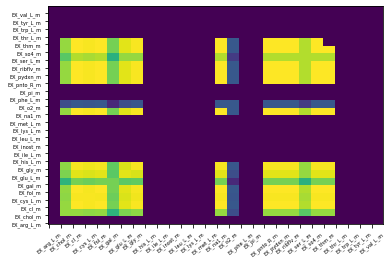

In [37]:
plt.pcolor(df)
plt.yticks(np.arange(0.1, len(df.index), 1), df.index, fontsize=5)
plt.xticks(np.arange(0.1, len(df.columns), 1), df.columns, fontsize=5, rotation=40)
#plt.figure(figsize=(100, 100),dpi=300)
plt.savefig("./figures/heatmap.png", dpi=300)

In [34]:
df

,EX_arg_L_m,EX_chol_m,EX_cl_m,EX_cys_L_m,EX_fol_m,EX_gal_m,EX_glu_L_m,EX_gly_m,EX_his_L_m,EX_ile_L_m,...,EX_pnto_R_m,EX_pydxn_m,EX_ribflv_m,EX_ser_L_m,EX_so4_m,EX_thm_m,EX_thr_L_m,EX_trp_L_m,EX_tyr_L_m,EX_val_L_m
reactions,,,,,,,,,,,,,,,,,,,,,
EX_arg_L_m,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0
EX_chol_m,0,0.021746,0.021746,0.021527,0.021699,0.016733,0.020754,0.021446,0,0,...,0.021746,0.021746,0.021746,0.019201,0.021746,0.021746,0,0,0,0
EX_cl_m,0,0.021746,0.025877,0.025609,0.025806,0.020500,0.024712,0.025593,0,0,...,0.025877,0.025877,0.025877,0.022907,0.025877,0.025877,0,0,0,0
EX_cys_L_m,0,0.021527,0.025609,0.025609,0.025543,0.020028,0.024409,0.025313,0,0,...,0.025609,0.025609,0.025609,0.022458,0.025609,0.025609,0,0,0,0
EX_fol_m,0,0.021699,0.025806,0.025543,0.025806,0.020500,0.024680,0.025485,0,0,...,0.025806,0.025806,0.025806,0.022907,0.025806,0.025806,0,0,0,0
EX_gal_m,0,0.016733,0.020500,0.020028,0.020500,0.020500,0.019242,0.019512,0,0,...,0.020500,0.020500,0.020500,0.016420,0.020500,0.020500,0,0,0,0
EX_glu_L_m,0,0.020754,0.024712,0.024409,0.024680,0.019242,0.024712,0.024287,0,0,...,0.024712,0.024712,0.024712,0.021828,0.024712,0.024712,0,0,0,0
EX_gly_m,0,0.021446,0.025593,0.025313,0.025485,0.019512,0.024287,0.025593,0,0,...,0.025593,0.025593,0.025593,0.021734,0.025593,0.025593,0,0,0,0
EX_his_L_m,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0


In [ ]:
t_u=0
t_l=0
c=0
only_med_func=[]
only_med_func_great=[]
single_med_50=[]
single_med_50_pop=[]

for r in only_med:
    t_u=r.upper_bound
    t_l=r.lower_bound
    r.upper_bound = 0
    r.lower_bound = 0
    sol_i = com.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
    
    #print('Zero bounds: ', r.lower_bound, r.upper_bound)
    
    if sol_i.growth_rate < goal*0.75 or sol_i.members.growth_rate['A']< goalA*0.6 or sol_i.members.growth_rate['B']< goalB*0.6 or sol_i.members.growth_rate['C']< goalC*0.6:
        print(c, r.id, end=' - ')
        print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'], end='\n\n')
        #print('Original flux: ', sol.fluxes[r.id].medium)
        #print('Flux: ', sol_i.fluxes[r.id].medium)
        #print('Original bounds: ', t_l, t_u, end='\n--------------------------------------------------->\n')
    #else:
        #print('Original bounds: ', t_l, t_u, end='\n-----------------------------\n')
        
    r.upper_bound = t_u
    r.lower_bound = t_l
    if sol_i.growth_rate < goal*0.75 and sol_i.growth_rate > 0 :
        only_med_func.append(r)
    if sol_i.growth_rate > 0 :
        only_med_func_great.append(r)
    if sol_i.growth_rate <= goal*0.5:
        single_med_50.append(r.id)
    if sol_i.members.growth_rate['A']< goalA*0.5:
        single_med_50_pop.append((r.id, sol_i.members.growth_rate['A']))
    if sol_i.members.growth_rate['B']< goalB*0.5:
        single_med_50_pop.append((r.id, sol_i.members.growth_rate['B']))
    if sol_i.members.growth_rate['C']< goalC*0.5:
        single_med_50_pop.append((r.id, sol_i.members.growth_rate['C']))
        
        
    #print('Restored bounds: ', r.lower_bound, r.upper_bound, end='\n\n')
    c+=1

print(single_med_50,end='\n\n\n')
print(single_med_50_pop)

In [ ]:
#check for all medium exchange reactions individually

In [23]:
t_u=0
t_l=0
c=0
only_med_func=[]
only_med_func_great=[]
single_med_50=[]
single_med_50_pop=[]

for r in only_med:
    t_u=r.upper_bound
    t_l=r.lower_bound
    r.upper_bound = 0
    r.lower_bound = 0
    sol_i = com.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
    
    #print('Zero bounds: ', r.lower_bound, r.upper_bound)
    
    if sol_i.growth_rate < goal*0.75 or sol_i.members.growth_rate['A']< goalA*0.6 or sol_i.members.growth_rate['B']< goalB*0.6 or sol_i.members.growth_rate['C']< goalC*0.6:
        print(c, r.id, end=' - ')
        print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'], end='\n\n')
        #print('Original flux: ', sol.fluxes[r.id].medium)
        #print('Flux: ', sol_i.fluxes[r.id].medium)
        #print('Original bounds: ', t_l, t_u, end='\n--------------------------------------------------->\n')
    #else:
        #print('Original bounds: ', t_l, t_u, end='\n-----------------------------\n')
        
    r.upper_bound = t_u
    r.lower_bound = t_l
    if sol_i.growth_rate < goal*0.75 and sol_i.growth_rate > 0 :
        only_med_func.append(r)
    if sol_i.growth_rate > 0 :
        only_med_func_great.append(r)
    if sol_i.growth_rate <= goal*0.5:
        single_med_50.append(r.id)
    if sol_i.members.growth_rate['A']< goalA*0.5:
        single_med_50_pop.append((r.id, sol_i.members.growth_rate['A']))
    if sol_i.members.growth_rate['B']< goalB*0.5:
        single_med_50_pop.append((r.id, sol_i.members.growth_rate['B']))
    if sol_i.members.growth_rate['C']< goalC*0.5:
        single_med_50_pop.append((r.id, sol_i.members.growth_rate['C']))
        
        
    #print('Restored bounds: ', r.lower_bound, r.upper_bound, end='\n\n')
    c+=1

print(single_med_50,end='\n\n\n')
print(single_med_50_pop)

1 EX_arg_L_m - Growth:  0.0 0.0 0.0 0.0

11 EX_his_L_m - Growth:  0.0 0.0 0.0 0.0

12 EX_ile_L_m - Growth:  0.0 0.0 0.0 0.0

13 EX_inost_m - Growth:  0.0 0.0 0.0 0.0

14 EX_leu_L_m - Growth:  0.0 0.0 0.0 0.0

15 EX_lys_L_m - Growth:  0.0 0.0 0.0 0.0

16 EX_met_L_m - Growth:  0.0 0.0 0.0 0.0

19 EX_o2_m - Growth:  0.010054594473570516 0.0021079652427402366 0.009137849130764228 0.01212749740431764

20 EX_phe_L_m - Growth:  0.0 0.0 0.0 0.0

21 EX_pi_m - Growth:  0.0 0.0 0.0 0.0

29 EX_thr_L_m - Growth:  0.0 0.0 0.0 0.0

30 EX_trp_L_m - Growth:  0.0 0.0 0.0 0.0

31 EX_tyr_L_m - Growth:  0.0 0.0 0.0 0.0

32 EX_val_L_m - Growth:  0.0 0.0 0.0 0.0

['EX_arg_L_m', 'EX_his_L_m', 'EX_ile_L_m', 'EX_inost_m', 'EX_leu_L_m', 'EX_lys_L_m', 'EX_met_L_m', 'EX_o2_m', 'EX_phe_L_m', 'EX_pi_m', 'EX_thr_L_m', 'EX_trp_L_m', 'EX_tyr_L_m', 'EX_val_L_m']


[('EX_arg_L_m', 0.0), ('EX_arg_L_m', 0.0), ('EX_arg_L_m', 0.0), ('EX_his_L_m', 0.0), ('EX_his_L_m', 0.0), ('EX_his_L_m', 0.0), ('EX_ile_L_m', 0.0), ('EX_ile_L

In [25]:
t_u=0
t_l=0
c=0
only_med_func2=[]
only_med_func_great2=[]
single_med_502=[]
single_med_50_pop2=[]

for r in only_med2:
    t_u=r.upper_bound
    t_l=r.lower_bound
    r.upper_bound = 0
    r.lower_bound = 0
    sol_i = com2.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
    
    #print('Zero bounds: ', r.lower_bound, r.upper_bound)
    
    if sol_i.growth_rate < goal2*0.75 or sol_i.members.growth_rate['A']< goal2A*0.6 or sol_i.members.growth_rate['B']< goal2B*0.6 or sol_i.members.growth_rate['C']< goal2C*0.6:
        print(c, r.id, end=' - ')
        print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'], end='\n\n')
        #print('Original flux: ', sol.fluxes[r.id].medium)
        #print('Flux: ', sol_i.fluxes[r.id].medium)
        #print('Original bounds: ', t_l, t_u, end='\n--------------------------------------------------->\n')
    #else:
        #print('Original bounds: ', t_l, t_u, end='\n-----------------------------\n')
        
    r.upper_bound = t_u
    r.lower_bound = t_l
    if sol_i.growth_rate < goal2*0.75 and sol_i.growth_rate > 0 :
        only_med_func2.append(r)
    if sol_i.growth_rate > 0 :
        only_med_func_great2.append(r)
    if sol_i.growth_rate <= goal2*0.5:
        single_med_502.append(r.id)
    if sol_i.members.growth_rate['A']< goal2A*0.5:
        single_med_50_pop2.append((r.id, sol_i.members.growth_rate['A']))
    if sol_i.members.growth_rate['B']< goal2B*0.5:
        single_med_50_pop2.append((r.id, sol_i.members.growth_rate['B']))
    if sol_i.members.growth_rate['C']< goal2C*0.5:
        single_med_50_pop2.append((r.id, sol_i.members.growth_rate['C']))
        
        
    #print('Restored bounds: ', r.lower_bound, r.upper_bound, end='\n\n')
    c+=1

print(single_med_502,end='\n\n\n')
print(single_med_50_pop2)

1 EX_arg_L_m - Growth:  0.0 0.0 0.0 0.0

11 EX_his_L_m - Growth:  0.0 0.0 0.0 0.0

12 EX_ile_L_m - Growth:  0.0 0.0 0.0 0.0

13 EX_inost_m - Growth:  0.0 0.0 0.0 0.0

14 EX_leu_L_m - Growth:  0.0 0.0 0.0 0.0

15 EX_lys_L_m - Growth:  0.0 0.0 0.0 0.0

16 EX_met_L_m - Growth:  0.0 0.0 0.0 0.0

19 EX_o2_m - Growth:  0.009241699697635088 0.01240582192407557 0.005919597948193389 0.003288221322905173

20 EX_phe_L_m - Growth:  0.0 0.0 0.0 0.0

21 EX_pi_m - Growth:  0.0 0.0 0.0 0.0

29 EX_thr_L_m - Growth:  0.0 0.0 0.0 0.0

30 EX_trp_L_m - Growth:  0.0 0.0 0.0 0.0

31 EX_tyr_L_m - Growth:  0.0 0.0 0.0 0.0

32 EX_val_L_m - Growth:  0.0 0.0 0.0 0.0

['EX_arg_L_m', 'EX_his_L_m', 'EX_ile_L_m', 'EX_inost_m', 'EX_leu_L_m', 'EX_lys_L_m', 'EX_met_L_m', 'EX_o2_m', 'EX_phe_L_m', 'EX_pi_m', 'EX_thr_L_m', 'EX_trp_L_m', 'EX_tyr_L_m', 'EX_val_L_m']


[('EX_arg_L_m', 0.0), ('EX_arg_L_m', 0.0), ('EX_arg_L_m', 0.0), ('EX_his_L_m', 0.0), ('EX_his_L_m', 0.0), ('EX_his_L_m', 0.0), ('EX_ile_L_m', 0.0), ('EX_ile_L_

In [ ]:
#Check for pairs of medium exchange reactions removal

In [26]:
t_u=0
t_l=0
pairs_med_50=[]
pairs_med_50_pop=[]
cou=0

for r in only_med_func:
    c=1
    cou+=1
    t_u=r.upper_bound
    t_l=r.lower_bound
    r.upper_bound = 0
    r.lower_bound = 0
    print(cou, end=':\n')
    for r2 in only_med_func[cou:]:
        t_u2=r2.upper_bound
        t_l2=r2.lower_bound
        r2.upper_bound = 0
        r2.lower_bound = 0
        
        sol_i = com.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
        #print('Zero bounds: ', r.lower_bound, r.upper_bound, r2.lower_bound, r2.upper_bound)
        
        if sol_i.growth_rate < goal*0.6 or sol_i.members.growth_rate['A']< goalA*0.75 or sol_i.members.growth_rate['B']< goalB*0.75 or sol_i.members.growth_rate['C']< goalC*0.75:
            print(c, r.id, r2.id)
            print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'], end='\n\n')
            
            #print('Original flux: ', sol.fluxes[r.id].medium, sol.fluxes[r2.id].medium)
            #print('Flux: ', sol_i.fluxes[r.id].medium, sol_i.fluxes[r2.id].medium)
            #print('Original bounds: ', t_l, t_u, t_l2, t_u2, end='\n--------------------------------------------------->\n')
        #else:
            #print('Original bounds: ', t_l, t_u, t_l2, t_u2, end='\n-----------------------------\n')
            
        if sol_i.growth_rate <= goal*0.5:
            pairs_med_50.append((r.id,r2.id))
        
        if sol_i.members.growth_rate['A']< goalA*0.5 or sol_i.members.growth_rate['B']< goalB*0.5 or sol_i.members.growth_rate['C']< goalC*0.5:
            pairs_med_50_pop.append((r.id,r2.id))
            
            
        r2.upper_bound = t_u2
        r2.lower_bound = t_l2
        #print('Restored bounds: ', r2.lower_bound, r2.upper_bound, end='\n\n')
        c+=1
    r.upper_bound = t_u
    r.lower_bound = t_l
    print('----------------------------------------Restored bounds: ', r.lower_bound, r.upper_bound, end='\n\n')
    
print(pairs_med_50)
pairs_med_50_pop

1:
----------------------------------------Restored bounds:  -0.2 10.0

[]


[]

In [27]:
t_u=0
t_l=0
pairs_med_502=[]
pairs_med_50_pop2=[]
cou=0

for r in only_med_func2:
    c=1
    cou+=1
    t_u=r.upper_bound
    t_l=r.lower_bound
    r.upper_bound = 0
    r.lower_bound = 0
    print(cou, end=':\n')
    for r2 in only_med_func2[cou:]:
        t_u2=r2.upper_bound
        t_l2=r2.lower_bound
        r2.upper_bound = 0
        r2.lower_bound = 0
        
        sol_i = com2.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
        #print('Zero bounds: ', r.lower_bound, r.upper_bound, r2.lower_bound, r2.upper_bound)
        
        if sol_i.growth_rate < goal2*0.6 or sol_i.members.growth_rate['A']< goal2A*0.75 or sol_i.members.growth_rate['B']< goal2B*0.75 or sol_i.members.growth_rate['C']< goal2C*0.75:
            print(c, r.id, r2.id)
            print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'], end='\n\n')
            
            #print('Original flux: ', sol.fluxes[r.id].medium, sol.fluxes[r2.id].medium)
            #print('Flux: ', sol_i.fluxes[r.id].medium, sol_i.fluxes[r2.id].medium)
            #print('Original bounds: ', t_l, t_u, t_l2, t_u2, end='\n--------------------------------------------------->\n')
        #else:
            #print('Original bounds: ', t_l, t_u, t_l2, t_u2, end='\n-----------------------------\n')
            
        if sol_i.growth_rate <= goal2*0.5:
            pairs_med_502.append((r.id,r2.id))
        
        if sol_i.members.growth_rate['A']< goal2A*0.5 or sol_i.members.growth_rate['B']< goal2B*0.5 or sol_i.members.growth_rate['C']< goal2C*0.5:
            pairs_med_50_pop2.append((r.id,r2.id))
            
            
        r2.upper_bound = t_u2
        r2.lower_bound = t_l2
        #print('Restored bounds: ', r2.lower_bound, r2.upper_bound, end='\n\n')
        c+=1
    r.upper_bound = t_u
    r.lower_bound = t_l
    print('----------------------------------------Restored bounds: ', r.lower_bound, r.upper_bound, end='\n\n')
    
print(pairs_med_502)
pairs_med_50_pop2

1:
----------------------------------------Restored bounds:  -0.2 10.0

[]


[]

In [28]:
t_u=0
t_l=0
pairs_all_med_50=[]
pairs_all_med_50_pop=[]
for r in only_med_func_great:
    c=1
    t_u=r.upper_bound
    t_l=r.lower_bound
    r.upper_bound = 0
    r.lower_bound = 0
    for r2 in only_med_func_great:
        t_u2=r2.upper_bound
        t_l2=r2.lower_bound
        r2.upper_bound = 0
        r2.lower_bound = 0
        
        sol_i = com.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
        #print('Zero bounds: ', r.lower_bound, r.upper_bound, r2.lower_bound, r2.upper_bound)
        
        if sol_i.growth_rate < goal*0.5 or sol_i.members.growth_rate['A']< goalA*0.4 or sol_i.members.growth_rate['B']< goalB*0.4 or sol_i.members.growth_rate['C']< goalC*0.4:
            print(c, r.id, r2.id)
            print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'], end='\n\n')
            #print('Original flux: ', sol.fluxes[r.id].medium, sol.fluxes[r2.id].medium)
            #print('Flux: ', sol_i.fluxes[r.id].medium, sol_i.fluxes[r2.id].medium)
            #print('Original bounds: ', t_l, t_u, t_l2, t_u2, end='\n--------------------------------------------------->\n')
        #else:
            #print('Original bounds: ', t_l, t_u, t_l2, t_u2, end='\n-----------------------------\n')
            
        if sol_i.growth_rate <= goal*0.5:
            pairs_all_med_50.append((r.id,r2.id))
            
        if sol_i.members.growth_rate['A']< goalA*0.5 or sol_i.members.growth_rate['B']< goalB*0.5 or sol_i.members.growth_rate['C']< goalC*0.5:
            pairs_all_med_50_pop.append((r.id,r2.id))
            
            
        r2.upper_bound = t_u2
        r2.lower_bound = t_l2
        #print('Restored bounds: ', r2.lower_bound, r2.upper_bound, end='\n\n')
        c+=1
    r.upper_bound = t_u
    r.lower_bound = t_l
    print('----------------------------------------Restored bounds: ', r.lower_bound, r.upper_bound, end='\n\n')

print(pairs_all_med_50_pop)
pairs_all_med_50

13 EX_ala_L_m EX_o2_m
Growth:  0.007858882395396428 0.0016474115490227614 0.007142116586393411 0.009479309456868687

----------------------------------------Restored bounds:  -0.2246 10.0

13 EX_asp_L_m EX_o2_m
Growth:  0.009241699697623418 0.001937459409536804 0.008398990619775892 0.011147087373650255

----------------------------------------Restored bounds:  -0.1514 10.0

13 EX_ca2_m EX_o2_m
Growth:  0.01005459447356687 0.002107965235700145 0.009137849131371398 0.012127497405077396

----------------------------------------Restored bounds:  -0.18018 10.0

8 EX_chol_m EX_gal_m
Growth:  0.018510662777355646 0.003881637352187746 0.016823761546361577 0.022326128826359884

13 EX_chol_m EX_o2_m
Growth:  0.008040037784464629 0.0016854091942740666 0.007306772827971598 0.009697795983335391

18 EX_chol_m EX_ser_L_m
Growth:  0.020203805706923903 0.004236776439464149 0.01836269758578075 0.024368181949006654

----------------------------------------Restored bounds:  -0.1428 10.0

13 EX_cl_m EX_o2_

[('EX_ala_L_m', 'EX_o2_m'),
 ('EX_asp_L_m', 'EX_o2_m'),
 ('EX_ca2_m', 'EX_o2_m'),
 ('EX_chol_m', 'EX_o2_m'),
 ('EX_cl_m', 'EX_o2_m'),
 ('EX_cys_L_m', 'EX_o2_m'),
 ('EX_fol_m', 'EX_o2_m'),
 ('EX_gal_m', 'EX_o2_m'),
 ('EX_glu_L_m', 'EX_o2_m'),
 ('EX_gly_m', 'EX_o2_m'),
 ('EX_na1_m', 'EX_o2_m'),
 ('EX_ncam_m', 'EX_o2_m'),
 ('EX_o2_m', 'EX_ala_L_m'),
 ('EX_o2_m', 'EX_asp_L_m'),
 ('EX_o2_m', 'EX_ca2_m'),
 ('EX_o2_m', 'EX_chol_m'),
 ('EX_o2_m', 'EX_cl_m'),
 ('EX_o2_m', 'EX_cys_L_m'),
 ('EX_o2_m', 'EX_fol_m'),
 ('EX_o2_m', 'EX_gal_m'),
 ('EX_o2_m', 'EX_glu_L_m'),
 ('EX_o2_m', 'EX_gly_m'),
 ('EX_o2_m', 'EX_na1_m'),
 ('EX_o2_m', 'EX_ncam_m'),
 ('EX_o2_m', 'EX_o2_m'),
 ('EX_o2_m', 'EX_pnto_R_m'),
 ('EX_o2_m', 'EX_pydxn_m'),
 ('EX_o2_m', 'EX_pyr_m'),
 ('EX_o2_m', 'EX_ribflv_m'),
 ('EX_o2_m', 'EX_ser_L_m'),
 ('EX_o2_m', 'EX_so4_m'),
 ('EX_o2_m', 'EX_thm_m'),
 ('EX_pnto_R_m', 'EX_o2_m'),
 ('EX_pydxn_m', 'EX_o2_m'),
 ('EX_pyr_m', 'EX_o2_m'),
 ('EX_ribflv_m', 'EX_o2_m'),
 ('EX_ser_L_m', 'EX_o2_m'),
 

In [ ]:
t_u=0
t_l=0
pairs_all_med_502=[]
pairs_all_med_50_pop2=[]
for r in only_med_func_great2:
    c=1
    t_u=r.upper_bound
    t_l=r.lower_bound
    r.upper_bound = 0
    r.lower_bound = 0
    for r2 in only_med_func_great2:
        t_u2=r2.upper_bound
        t_l2=r2.lower_bound
        r2.upper_bound = 0
        r2.lower_bound = 0
        
        sol_i = com2.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
        #print('Zero bounds: ', r.lower_bound, r.upper_bound, r2.lower_bound, r2.upper_bound)
        
        if sol_i.growth_rate < goal2*0.6 or sol_i.members.growth_rate['A']< goal2A*0.75 or sol_i.members.growth_rate['B']< goal2B*0.75 or sol_i.members.growth_rate['C']< goal2C*0.75:
            print(c, r.id, r2.id)
            print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'], end='\n\n')
            #print('Original flux: ', sol.fluxes[r.id].medium, sol.fluxes[r2.id].medium)
            #print('Flux: ', sol_i.fluxes[r.id].medium, sol_i.fluxes[r2.id].medium)
            #print('Original bounds: ', t_l, t_u, t_l2, t_u2, end='\n--------------------------------------------------->\n')
        #else:
            #print('Original bounds: ', t_l, t_u, t_l2, t_u2, end='\n-----------------------------\n')
            
        if sol_i.growth_rate <= goal2*0.5:
            pairs_all_med_502.append((r.id,r2.id))
            
        if sol_i.members.growth_rate['A']< goal2A*0.5 or sol_i.members.growth_rate['B']< goal2B*0.5 or sol_i.members.growth_rate['C']< goal2C*0.5:
            pairs_all_med_50_pop2.append((r.id,r2.id))
            
            
        r2.upper_bound = t_u2
        r2.lower_bound = t_l2
        #print('Restored bounds: ', r2.lower_bound, r2.upper_bound, end='\n\n')
        c+=1
    r.upper_bound = t_u
    r.lower_bound = t_l
    print('----------------------------------------Restored bounds: ', r.lower_bound, r.upper_bound, end='\n\n')

print(pairs_all_med_50_pop2)
pairs_all_med_502

13 EX_ala_L_m EX_o2_m
Growth:  0.007321142460071697 0.009827869165326849 0.004689213103461927 0.002604674144966088

----------------------------------------Restored bounds:  -0.2246 10.0

13 EX_asp_L_m EX_o2_m
Growth:  0.009241699697635088 0.01240582192407557 0.005919597948193389 0.003288221322905173

----------------------------------------Restored bounds:  0 0

13 EX_ca2_m EX_o2_m
Growth:  0.00924169969762206 0.012405821924106003 0.005919597948211445 0.0032882213226722735



In [ ]:
#Check for all other community exchange reactions

In [12]:
t_u=0
t_l=0
ex_50=[]
for r in com.reactions:
    if 'EX_' in r.id and '_m' in r.id and '__' not in r.id and r.id not in com.medium:
        if r.lower_bound!=0 or r.upper_bound!=0:
            t_u=r.upper_bound
            t_l=r.lower_bound
            r.upper_bound = 0
            r.lower_bound = 0
            sol_i = com.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
            #print('Zero bounds: ', r.lower_bound,r.upper_bound)
            if sol_i.growth_rate < goal*0.6 or sol_i.members.growth_rate['A']< goalA*0.8 or sol_i.members.growth_rate['B']< goalB*0.8 or sol_i.members.growth_rate['C']< goalC*0.8:
                print(r.id)
                print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'], end='\n\n')
                #print('Original flux: ', sol.fluxes[r.id].medium)
                #print('Flux: ', sol_i.fluxes[r.id].medium)
                #print('Original bounds: ',r.lower_bound,r.upper_bound, end='\n--------------------------------------------------->\n\n')
            #else:
                #print('Original bounds: ',r.lower_bound,r.upper_bound, end='\n-----------------------------\n\n')
            
            if sol_i.growth_rate < goal*0.5:
                ex_50.append(r.id)
            
            r.upper_bound = t_u
            r.lower_bound = t_l
            
ex_50

[]

In [13]:
t_u=0
t_l=0
ex_502=[]
for r in com2.reactions:
    if 'EX_' in r.id and '_m' in r.id and '__' not in r.id and r.id not in com2.medium:
        if r.lower_bound!=0 or r.upper_bound!=0:
            t_u=r.upper_bound
            t_l=r.lower_bound
            r.upper_bound = 0
            r.lower_bound = 0
            sol_i = com2.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
            #print('Zero bounds: ', r.lower_bound,r.upper_bound)
            if sol_i.growth_rate < goal2*0.6 or sol_i.members.growth_rate['A']< goal2A*0.8 or sol_i.members.growth_rate['B']< goal2B*0.8 or sol_i.members.growth_rate['C']< goal2C*0.8:
                print(r.id)
                print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'], end='\n\n')
                #print('Original flux: ', sol.fluxes[r.id].medium)
                #print('Flux: ', sol_i.fluxes[r.id].medium)
                #print('Original bounds: ',r.lower_bound,r.upper_bound, end='\n--------------------------------------------------->\n\n')
            #else:
                #print('Original bounds: ',r.lower_bound,r.upper_bound, end='\n-----------------------------\n\n')
            
            if sol_i.growth_rate < goal2*0.5:
                ex_502.append(r.id)
            
            r.upper_bound = t_u
            r.lower_bound = t_l
            
ex_502

[]

In [ ]:
#check for all reactions related to the mitochondria

In [8]:
d = {}
for r in com.reactions:
    if 'm__' in r.id:
        temp = r.id.split('__')
        if '___' in r.id:
            temp[0]+='_'
            temp[1]=temp[1][1:]
        if temp[0] not in d:
            d[temp[0]]=[]
        d[temp[0]].append(r)

In [9]:
d2 = {}
for r in com2.reactions:
    if 'm__' in r.id:
        temp = r.id.split('__')
        if '___' in r.id:
            temp[0]+='_'
            temp[1]=temp[1][1:]
        if temp[0] not in d2:
            d2[temp[0]]=[]
        d2[temp[0]].append(r)

In [10]:
t_u=0
t_l=0

mito_50=[]

for ra in d:
    t_u=[0]*len(d[ra])
    t_l=[0]*len(d[ra])
    for i,r in enumerate(d[ra]):
        t_u[i] = r.upper_bound
        t_l[i] =r.lower_bound
        r.upper_bound = 0
        r.lower_bound = 0
        #print('Zero bounds: ', r.lower_bound,r.upper_bound)
    try:
        sol_i = com.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
        
        if sol_i.growth_rate < goal*0.95 or sol_i.members.growth_rate['A']< goalA*0.95 or sol_i.members.growth_rate['B']< goalB*0.95 or sol_i.members.growth_rate['C']< goalC*0.95:
            print(ra)
            print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'],end='\n\n')
            #print('Original bounds: ',t_l,t_u, end='\n--------------------------------------------------->\n')
        #else:
           # print('Original bounds: ',t_l,t_u, end='\n-----------------------------\n')
            
        if sol_i.growth_rate < goal*0.5:
            mito_50.append(r.id)
        
    except:
        print('Error',temp, end='\n--------------------------\n\n')
    
    for i,r in enumerate(d[ra]):
        r.upper_bound = t_u[i]
        r.lower_bound = t_l[i]
        #print('Restored bounds: ',r.lower_bound,r.upper_bound)
    #print('-----------------------\n')
mito_50

ACCOACm
Growth:  0.025907638495352978 0.0 0.0 0.0499379106135748

FUMm
Growth:  0.027058324854995708 0.00880328962928626 0.0 0.05062489337438389

G5SADrm
Growth:  0.0 0.0 0.0 0.0

P5CRm
Growth:  0.0 0.0 0.0 0.0

PDHm
Growth:  0.025484180034171675 0.005344342332269564 0.023162149663133746 0.030736696201790616

ATPS4m
Growth:  0.01840004408557728 0.0038584349296842844 0.01672321770641002 0.022192714664201793

CYOR_u10m
Growth:  0.01664200585663885 0.0034896839548776157 0.015125296857127416 0.020072393106600667

HMGCOAtm
Growth:  0.027447133329677048 0.0 0.025427556802540774 0.03374254725274005

NADH2_u10m
Growth:  0.024302576305669496 0.005096499293428985 0.02208816321528773 0.02931159644254421

O2tm
Growth:  0.021386943691115018 0.004484941291251955 0.019438078553463165 0.025795132131713885

PE_HStm
Growth:  0.0 0.0 0.0 0.0

PSFLIPm
Growth:  0.0 0.0 0.0 0.0



['G5SADrm__C', 'P5CRm__C', 'PE_HStm__C', 'PSFLIPm__C']

In [11]:
t_u=0
t_l=0

mito_502=[]

for ra in d2:
    t_u=[0]*len(d2[ra])
    t_l=[0]*len(d2[ra])
    for i,r in enumerate(d2[ra]):
        t_u[i] = r.upper_bound
        t_l[i] =r.lower_bound
        r.upper_bound = 0
        r.lower_bound = 0
        #print('Zero bounds: ', r.lower_bound,r.upper_bound)
    try:
        sol_i = com2.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
        
        if sol_i.growth_rate < goal2*0.95 or sol_i.members.growth_rate['A']< goal2A*0.95 or sol_i.members.growth_rate['B']< goal2B*0.95 or sol_i.members.growth_rate['C']< goal2C*0.95:
            print(ra)
            print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'],end='\n\n')
            #print('Original bounds: ',t_l,t_u, end='\n--------------------------------------------------->\n')
        #else:
           # print('Original bounds: ',t_l,t_u, end='\n-----------------------------\n')
            
        if sol_i.growth_rate < goal2*0.5:
            mito_502.append(r.id)
        
    except:
        print('Error',temp, end='\n--------------------------\n\n')
    
    for i,r in enumerate(d2[ra]):
        r.upper_bound = t_u[i]
        r.lower_bound = t_l[i]
        #print('Restored bounds: ',r.lower_bound,r.upper_bound)
    #print('-----------------------\n')
mito_502

ACCOACm
Growth:  0.025907460413842683 0.0 0.0 0.17024902314455131

FUMm
Growth:  0.02705832485498535 0.04405039017189001 0.0 0.01167894477589752

G5SADrm
Growth:  0.0 0.0 0.0 0.0

P5CRm
Growth:  0.0 0.0 0.0 0.0

PDHm
Growth:  0.02548418003416831 0.03420800836576263 0.016325172561019695 0.00906909653247887

ATPS4m
Growth:  0.018400044085625566 0.02469901407831569 0.011786795191692196 0.006547775588000172

CYOR_u10m
Growth:  0.016642005856585783 0.02233920963714497 0.010660526445558942 0.005922070681109079

HMGCOAtm
Growth:  0.02744667979565841 0.0 0.0765697689443168 0.04253831918709962

NADH2_u10m
Growth:  0.024302576305671043 0.03262194858636149 0.015568190529831145 0.008648550926087102

O2tm
Growth:  0.021386943691119067 0.02870831196534045 0.01370032108583838 0.007610845604108278

PE_HStm
Growth:  0.0 0.0 0.0 0.0

PSFLIPm
Growth:  0.0 0.0 0.0 0.0



['G5SADrm__C', 'P5CRm__C', 'PE_HStm__C', 'PSFLIPm__C']

In [ ]:
#Check for all other reactions 

In [17]:
d = {}
for r in com.reactions:
    if 'm' != str(r.id[len(r.id)-1]):
        temp = r.id.split('__')
        if '___' in r.id:
            temp[0]+='_'
            temp[1]=temp[1][1:]
        if temp[0] not in d:
            d[temp[0]]=[]
        d[temp[0]].append(r)

In [18]:
reac_50=[]
for ra in d:
    t_u=[0]*len(d[ra])
    t_l=[0]*len(d[ra])
    for i,r in enumerate(d[ra]):
        t_u[i] = r.upper_bound
        t_l[i] =r.lower_bound
        r.upper_bound = 0
        r.lower_bound = 0
        #print('Zero bounds: ', r.lower_bound,r.upper_bound)
    try:
        sol_i = com.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
        
        if sol_i.growth_rate < goal*0.7 and (sol_i.members.growth_rate['A']< goalA*0.9 or sol_i.members.growth_rate['B']< goalB*0.9 or sol_i.members.growth_rate['C']< goalC*0.9):
            print(ra)
            print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'],end='\n\n')
            #print('Original bounds: ',t_l,t_u, end='\n---------------------------------------------------------------------------------->\n')
        #else:
            #print('Original bounds: ',t_l,t_u, end='\n-----------------------------\n')
            
        if sol_i.growth_rate < goal*0.5:
            reac_50.append(r.id)
    except:
        print('Error',temp, end='\n--------------------------\n\n')
    
    for i,r in enumerate(d[ra]):
        r.upper_bound = t_u[i]
        r.lower_bound = t_l[i]
        #print('Restored bounds: ',r.lower_bound,r.upper_bound)
    #print('-----------------------\n')
reac_50

Error ['FAOXC8060m', 'C']
--------------------------

EX_arg_L_b
Growth:  0.0 0.0 0.0 0.0

EX_biomass_c
Growth:  0.0 0.0 0.0 0.0

Error ['FAOXC8060m', 'C']
--------------------------

EX_his_L_b
Growth:  0.0 0.0 0.0 0.0

EX_ile_L_b
Growth:  0.0 0.0 0.0 0.0

EX_inost_b
Growth:  0.0 0.0 0.0 0.0

EX_leu_L_b
Growth:  0.0 0.0 0.0 0.0

EX_lys_L_b
Growth:  0.0 0.0 0.0 0.0

EX_met_L_b
Growth:  0.0 0.0 0.0 0.0

EX_o2_b
Growth:  0.010043041709867095 0.0021055420129850217 0.009127348563430036 0.01211356393610323

EX_phe_L_b
Growth:  0.0 0.0 0.0 0.0

EX_pi_b
Growth:  0.0 0.0 0.0 0.0

EX_thr_L_b
Growth:  0.0 0.0 0.0 0.0

EX_trp_L_b
Growth:  0.0 0.0 0.0 0.0

EX_tyr_L_b
Growth:  0.0 0.0 0.0 0.0

EX_val_L_b
Growth:  0.0 0.0 0.0 0.0

3DSPHR
Growth:  0.0 0.0 0.0 0.0

ADSL1
Growth:  0.0 0.0 0.0 0.0

ADSL2
Growth:  0.0 0.0 0.0 0.0

ADSS
Growth:  0.0 0.0 0.0 0.0

AGPAT1
Growth:  0.0 0.0 0.0 0.0

AICART
Growth:  0.0 0.0 0.0 0.0

ASNS1
Growth:  0.0 0.0 0.0 0.0

ASPCTr
Growth:  0.0 0.0 0.0 0.0

C14STRr
Growth

2021-06-08 14:17:13.618 | WARNING  | micom.solution:solve:208 - solver encountered an error infeasible
2021-06-08 14:21:01.588 | WARNING  | micom.solution:solve:208 - solver encountered an error infeasible


Error ['FAOXC8060m', 'C']
--------------------------

CHSTEROLtrc
Growth:  0.0 0.0 0.0 0.0

EX_arg_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_his_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_ile_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_inost_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_leu_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_lys_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_met_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_o2_LPAREN_e_RPAREN_
Growth:  0.01004304170986562 0.002105542019692429 0.009127348562480897 0.012113563935649175

EX_phe_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_pi_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_thr_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_trp_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_tyr_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

EX_val_L_LPAREN_e_RPAREN_
Growth:  0.0 0.0 0.0 0.0

Error ['FAOXC8060m', 'C']
--------------------------

biomass_protein
Growth:  0.0 0.0 0.0 0.0

biomass_DNA
Growth:  0.

['EX_arg_L_b__C',
 'EX_biomass_c__C',
 'EX_his_L_b__C',
 'EX_ile_L_b__C',
 'EX_inost_b__C',
 'EX_leu_L_b__C',
 'EX_lys_L_b__C',
 'EX_met_L_b__C',
 'EX_o2_b__C',
 'EX_phe_L_b__C',
 'EX_pi_b__C',
 'EX_thr_L_b__C',
 'EX_trp_L_b__C',
 'EX_tyr_L_b__C',
 'EX_val_L_b__C',
 '3DSPHR__C',
 'ADSL1__C',
 'ADSL2__C',
 'ADSS__C',
 'AGPAT1__C',
 'AICART__C',
 'ASNS1__C',
 'ASPCTr__C',
 'C14STRr__C',
 'C3STKR2r__C',
 'C4STMO1r__C',
 'CBPS__C',
 'CDIPTr__C',
 'CLS_hs__C',
 'DHORTS__C',
 'DSAT__C',
 'FAS100COA__C',
 'FAS120COA__C',
 'FAS140COA__C',
 'FAS160COA__C',
 'FAS80COA_L__C',
 'G5SADrm__C',
 'GARFT__C',
 'GLNS__C',
 'GLUPRT__C',
 'GPAM_hs__C',
 'IMPC__C',
 'LNSTLSr__C',
 'NICRNS__C',
 'NP1__C',
 'OMPDC__C',
 'ORPT__C',
 'P5CRm__C',
 'PGPP_hs__C',
 'PGPPT__C',
 'PPM__C',
 'PRAGSr__C',
 'PRFGS__C',
 'PSDm_hs__C',
 'RNDR1__C',
 'SERPT__C',
 'SMS__C',
 'SQLEr__C',
 'SQLSr__C',
 'TMDS__C',
 'TRDR__C',
 'r0391__C',
 'r0781__C',
 'RE3273C__C',
 'RE3301C__C',
 'HMGCOARc__C',
 'CO2ter__C',
 'DATPtn__C',
 

In [22]:
print(reac_50)

['EX_arg_L_b__C', 'EX_biomass_c__C', 'EX_his_L_b__C', 'EX_ile_L_b__C', 'EX_inost_b__C', 'EX_leu_L_b__C', 'EX_lys_L_b__C', 'EX_met_L_b__C', 'EX_o2_b__C', 'EX_phe_L_b__C', 'EX_pi_b__C', 'EX_thr_L_b__C', 'EX_trp_L_b__C', 'EX_tyr_L_b__C', 'EX_val_L_b__C', '3DSPHR__C', 'ADSL1__C', 'ADSL2__C', 'ADSS__C', 'AGPAT1__C', 'AICART__C', 'ASNS1__C', 'ASPCTr__C', 'C14STRr__C', 'C3STKR2r__C', 'C4STMO1r__C', 'CBPS__C', 'CDIPTr__C', 'CLS_hs__C', 'DHORTS__C', 'DSAT__C', 'FAS100COA__C', 'FAS120COA__C', 'FAS140COA__C', 'FAS160COA__C', 'FAS80COA_L__C', 'G5SADrm__C', 'GARFT__C', 'GLNS__C', 'GLUPRT__C', 'GPAM_hs__C', 'IMPC__C', 'LNSTLSr__C', 'NICRNS__C', 'NP1__C', 'OMPDC__C', 'ORPT__C', 'P5CRm__C', 'PGPP_hs__C', 'PGPPT__C', 'PPM__C', 'PRAGSr__C', 'PRFGS__C', 'PSDm_hs__C', 'RNDR1__C', 'SERPT__C', 'SMS__C', 'SQLEr__C', 'SQLSr__C', 'TMDS__C', 'TRDR__C', 'r0391__C', 'r0781__C', 'RE3273C__C', 'RE3301C__C', 'HMGCOARc__C', 'CO2ter__C', 'DATPtn__C', 'DCTPtn__C', 'DGTPtn__C', 'DHORD9__C', 'FORtr__C', 'O2t__C', 'O2ter_

In [ ]:
#Plane phase

In [8]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from time import time
from cobra.flux_analysis import production_envelope


In [9]:
cs_data = cobra.flux_analysis.phenotype_phase_plane.find_carbon_sources(com)
cs_data

[<Reaction EX_arg_L_m at 0x27e7a6bdd48>,
 <Reaction EX_asp_L_m at 0x27e7a6bde48>,
 <Reaction EX_chol_m at 0x27e7a6c4188>,
 <Reaction EX_cys_L_m at 0x27e7a6c4688>,
 <Reaction EX_gal_m at 0x27e7a6c91c8>,
 <Reaction EX_glu_L_m at 0x27e7a6c94c8>,
 <Reaction EX_gly_m at 0x27e7a6c95c8>,
 <Reaction EX_his_L_m at 0x27e7a6c9cc8>,
 <Reaction EX_ile_L_m at 0x27e7a6c9dc8>,
 <Reaction EX_inost_m at 0x27e7a6c9ec8>,
 <Reaction EX_leu_L_m at 0x27e7a6cf208>,
 <Reaction EX_lys_L_m at 0x27e7a6cf508>,
 <Reaction EX_met_L_m at 0x27e7a6cf708>,
 <Reaction EX_phe_L_m at 0x27e7a6d5148>,
 <Reaction EX_pyr_m at 0x27e7a6d5948>,
 <Reaction EX_ser_L_m at 0x27e7a6d5b48>,
 <Reaction EX_thr_L_m at 0x27e7a6dd388>,
 <Reaction EX_trp_L_m at 0x27e7a6dd488>,
 <Reaction EX_tyr_L_m at 0x27e7a6dd588>,
 <Reaction EX_val_L_m at 0x27e7a6dd988>]

In [ ]:
#prod_env = production_envelope(com, [pairs_med_50[0][0],pairs_med_50[0][1]], carbon_sources=cs_data)
prod_env = production_envelope(com, ['EX_o2_m','EX_chol_m'], objective='EX_biomass_c__C', carbon_sources=cs_data)

In [ ]:
prod_env

In [ ]:
prod_env.plot(
    kind='line', x='EX_chol_m', y='mass_yield_maximum');

In [ ]:
print(com.objective)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(prod_env['EX_o2_m'], prod_env['EX_chol_m'], prod_env.mass_yield_maximum, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')
plt.show()

In [75]:
reacts=['FDH__A', 'FDH__B', 'FDH__C']

t_u=0
t_l=0

for r in com.reactions:
    if 'FDH__' in r.id:
        t_u=r.upper_bound
        t_l=r.lower_bound
        r.upper_bound = 0
        r.lower_bound = 0
        try:
            sol_i = com.cooperative_tradeoff(fraction=0.5, fluxes=True, pfba=True)
            print(r.id)
            print('Zero bounds: ', r.lower_bound,r.upper_bound)
            
            if sol_i.growth_rate < goal*0.95 or sol_i.members.growth_rate['A']< goalA*0.95 or sol_i.members.growth_rate['B']< goalB*0.95 or sol_i.members.growth_rate['C']< goalC*0.95:
                temp = r.id.split('__')
                if '___' in r.id:
                    temp[0]+='_'
                    temp[1]=temp[1][1:]

                print('Growth: ', sol_i.growth_rate, sol_i.members.growth_rate['A'], sol_i.members.growth_rate['B'], sol_i.members.growth_rate['C'])
                print('Original flux: ', sol.fluxes[temp[0]][temp[1]])
                print('Flux: ', sol_i.fluxes[temp[0]][temp[1]])
                print('Original bounds: ',t_l,t_u, end='\n--------------------------------------------------->\n\n')
            else:
                print('Original bounds: ',t_l,t_u, end='\n-----------------------------\n\n')
        except:
            print('Error',temp)
            
        r.upper_bound = t_u
        r.lower_bound = t_l

FDH__A
Zero bounds:  0 0
Growth:  0.04331404913491664 0.0 0.040127553519428046 0.05324834380381367
Original flux:  0.0001853264021832582
Flux:  0.0
Original bounds:  0.0 100.0
--------------------------------------------------->

FDH__C
Zero bounds:  0 0
Growth:  0.04331404913493348 0.0 0.040127553519744084 0.053248343803607955
Original flux:  0.0010657647844483007
Flux:  0.0
Original bounds:  0.0 100.0
--------------------------------------------------->

FTHFDH__C
Zero bounds:  0 0
Growth:  0.04331404913491481 0.0 0.040127553519372514 0.05324834380385199
Original flux:  0.08677084708092252
Flux:  0.0
Original bounds:  0.0 100.0
--------------------------------------------------->

